<a href="https://colab.research.google.com/github/ClauACuellar/Index/blob/main/Riesgo_Crediticio_German_Credit_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno_de_Trabajo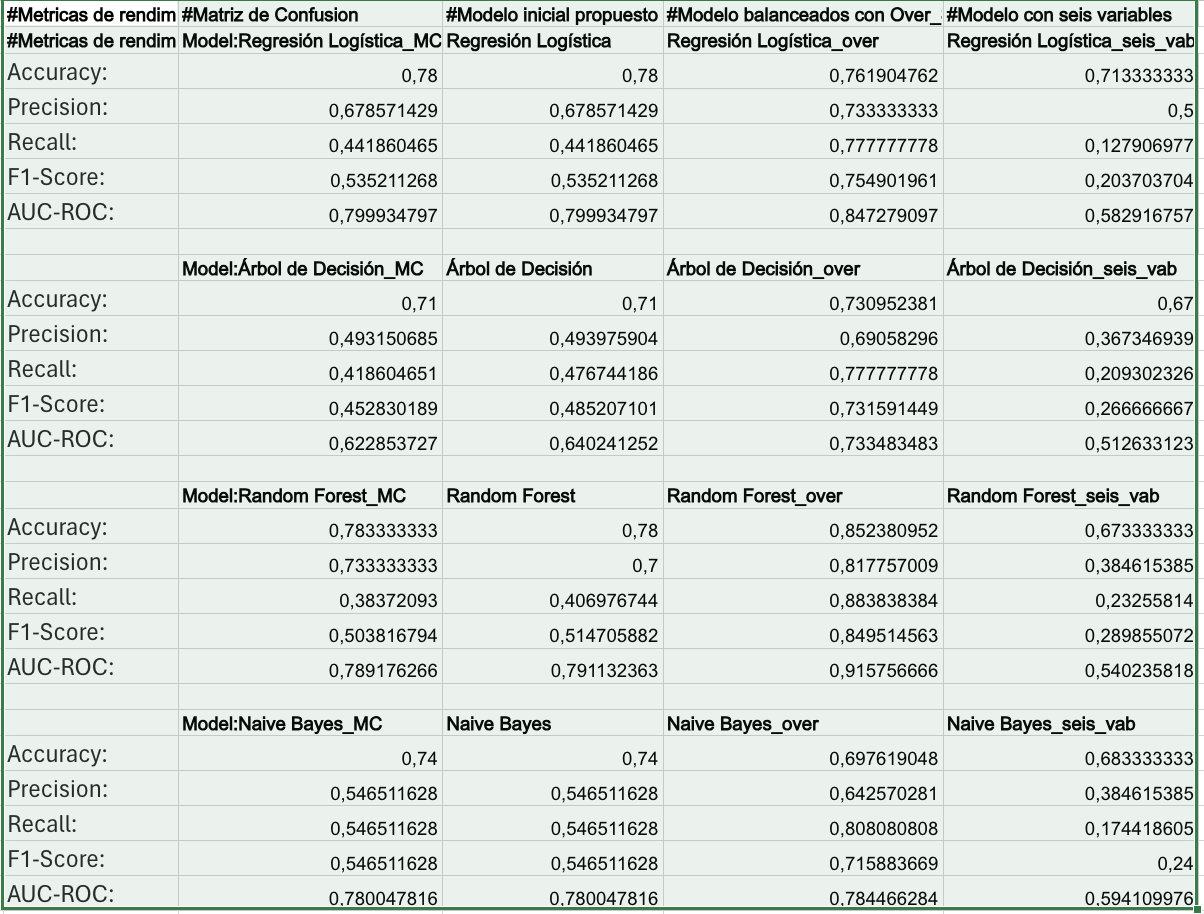

# ***INMERSIÓN DE DATOS CON PYTHON*** ✅

## **PROBLEMA DE NEGOCIO**

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

Tus tareas principales serán:
1. Preprocesamiento de Datos: Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. Exploración de Datos: Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. Construcción de Modelos: Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. Evaluación y Selección del Modelo: Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

# **1. Configuración del ambiente**




In [40]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

#drive.mount("/content/Drive")
warnings.filterwarnings("ignore")



# **2. Preprocesamiento de Datos**

In [41]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [42]:
df_banco = pd.read_csv('/content/drive/MyDrive/Alura_latam/Inmersion_datos/german_credit (1).csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [43]:
df_banco.shape

(1000, 21)

In [44]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [45]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [46]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [47]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [48]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [49]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
649,1,1,12,3,8,684,5,3,4,3,1,4,3,40,3,1,1,2,2,0,1
250,0,1,6,5,1,666,2,2,3,2,1,4,1,39,3,2,2,2,1,1,1
525,0,2,26,3,2,7966,5,4,2,3,1,3,3,30,3,2,2,3,1,0,1


# **3. Exploración de Datos**

In [50]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [51]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [52]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [53]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


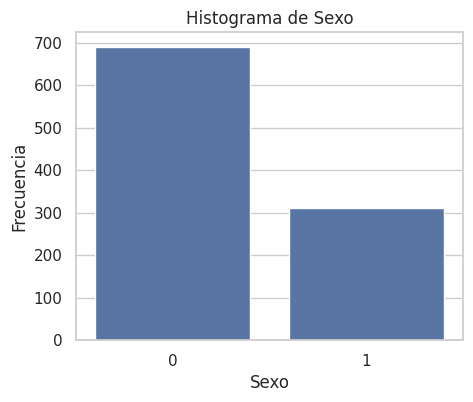

In [54]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [55]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

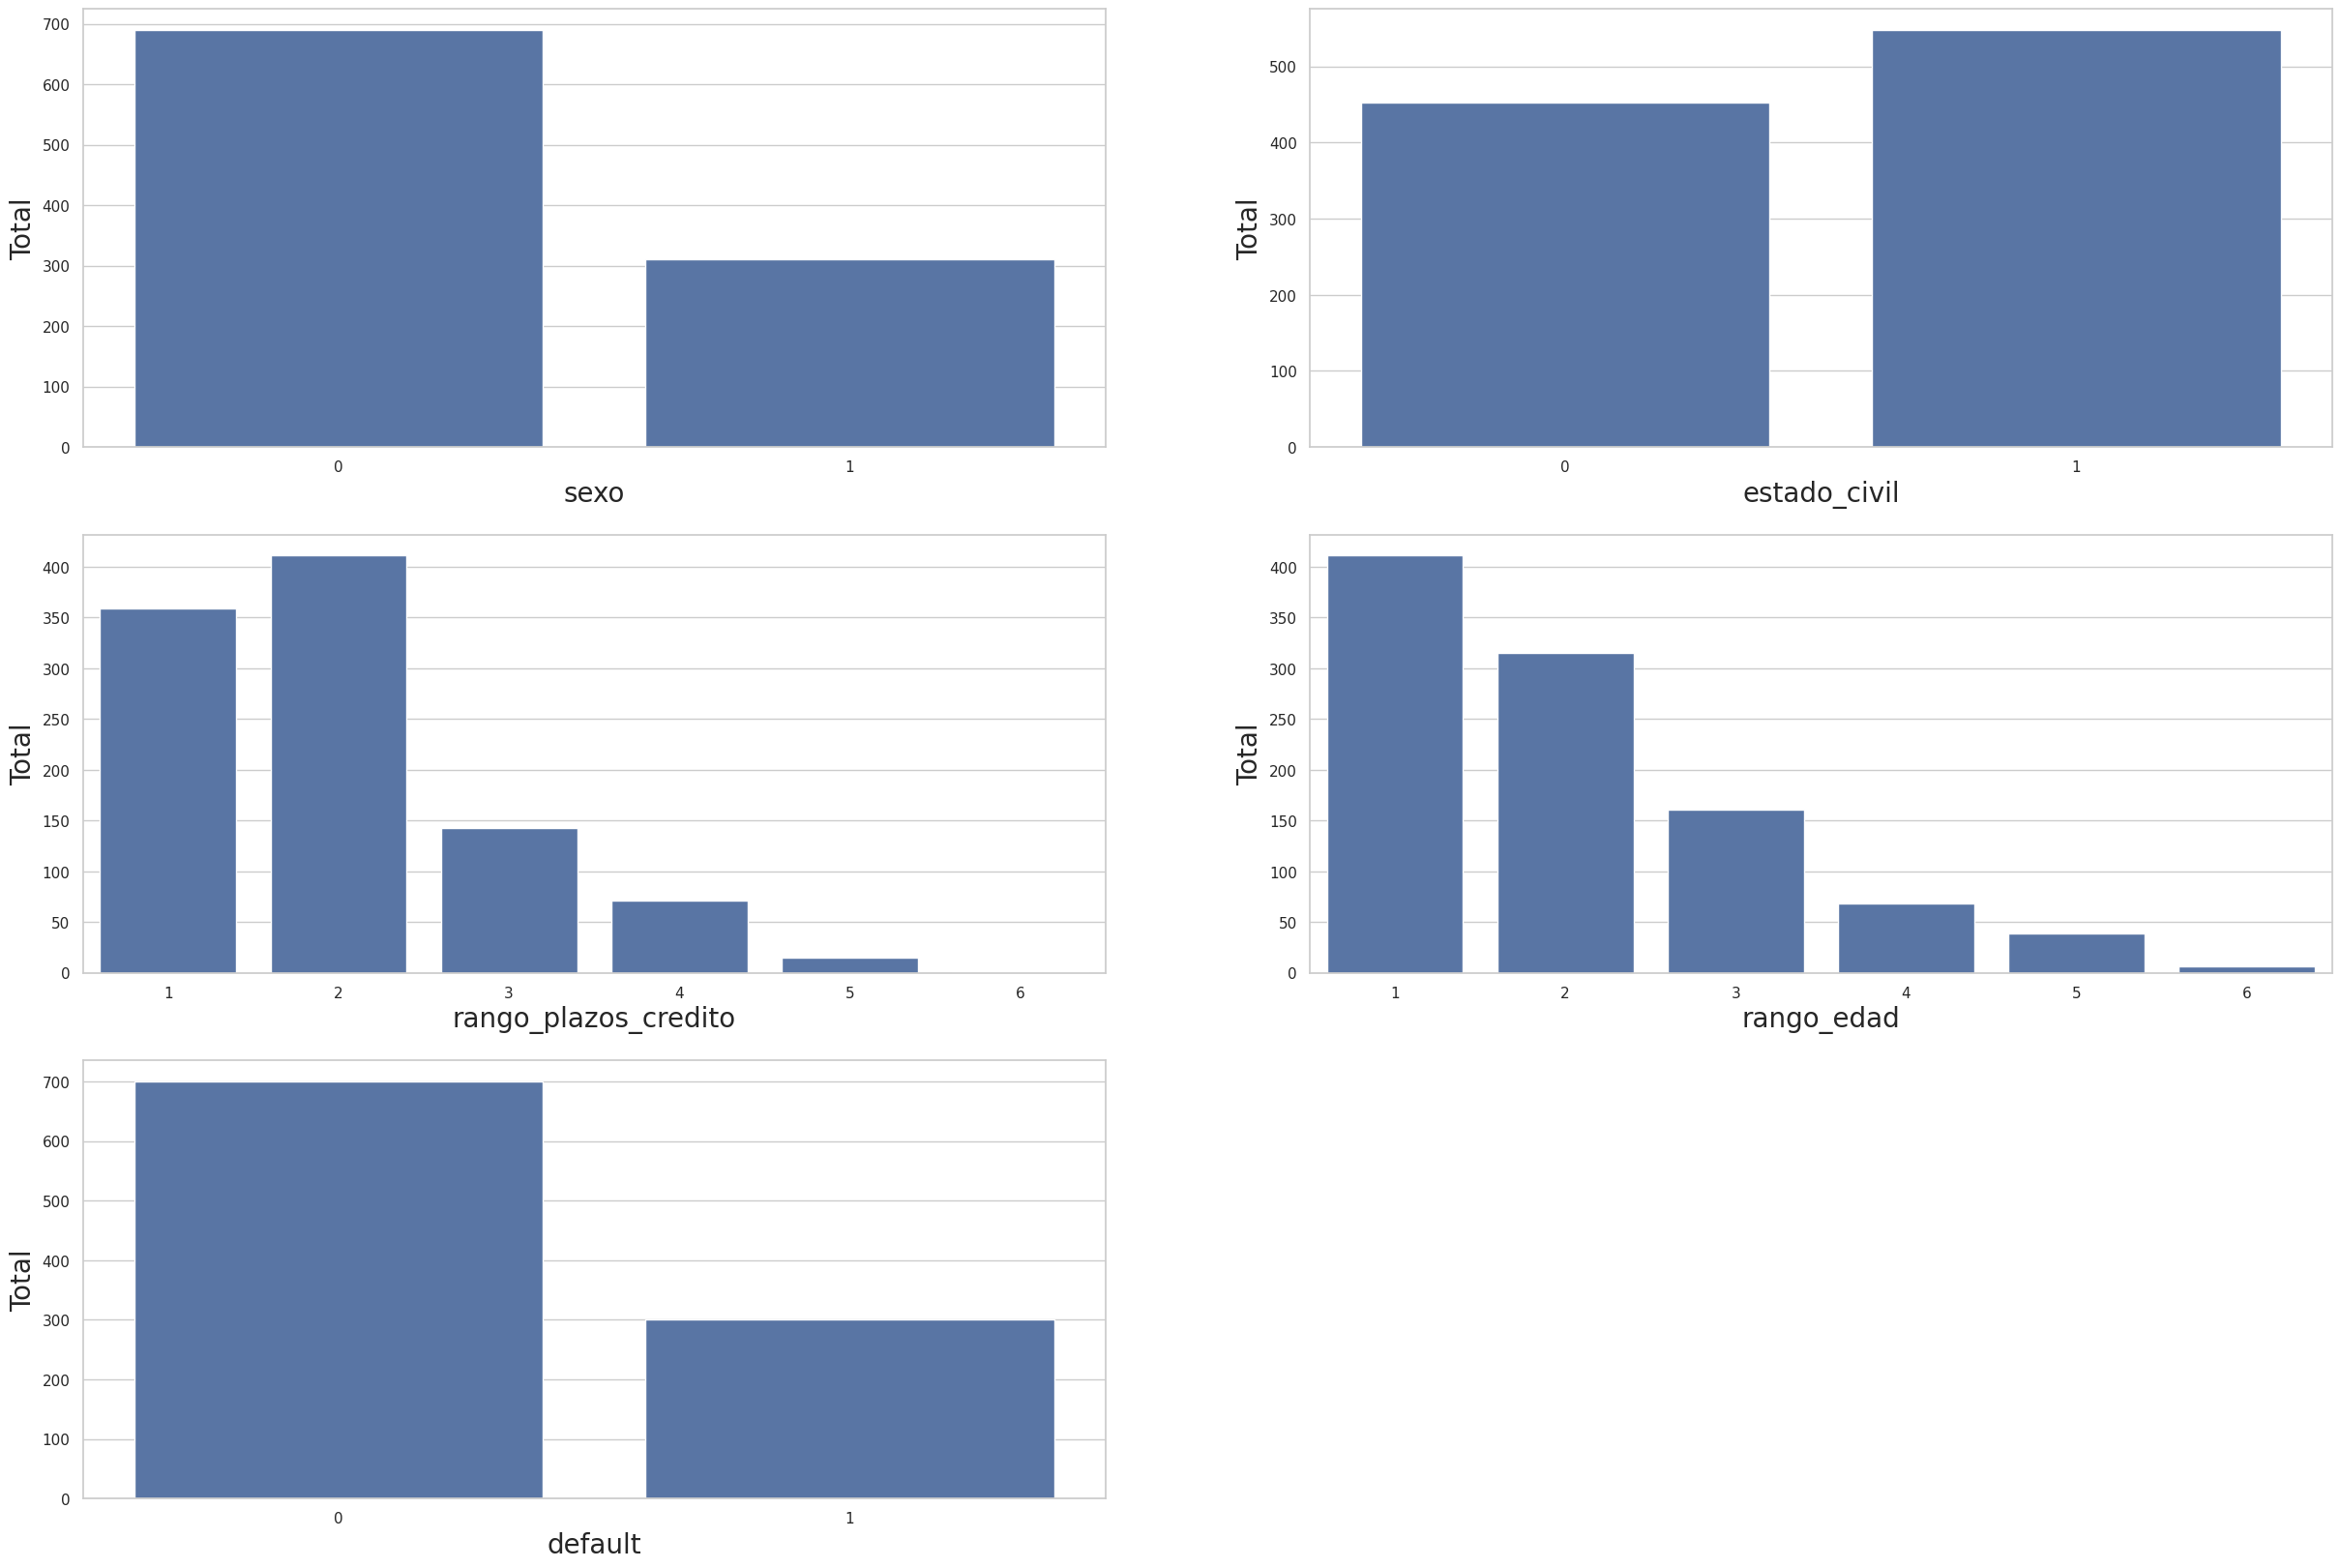

In [56]:
analisis_exploratorio()

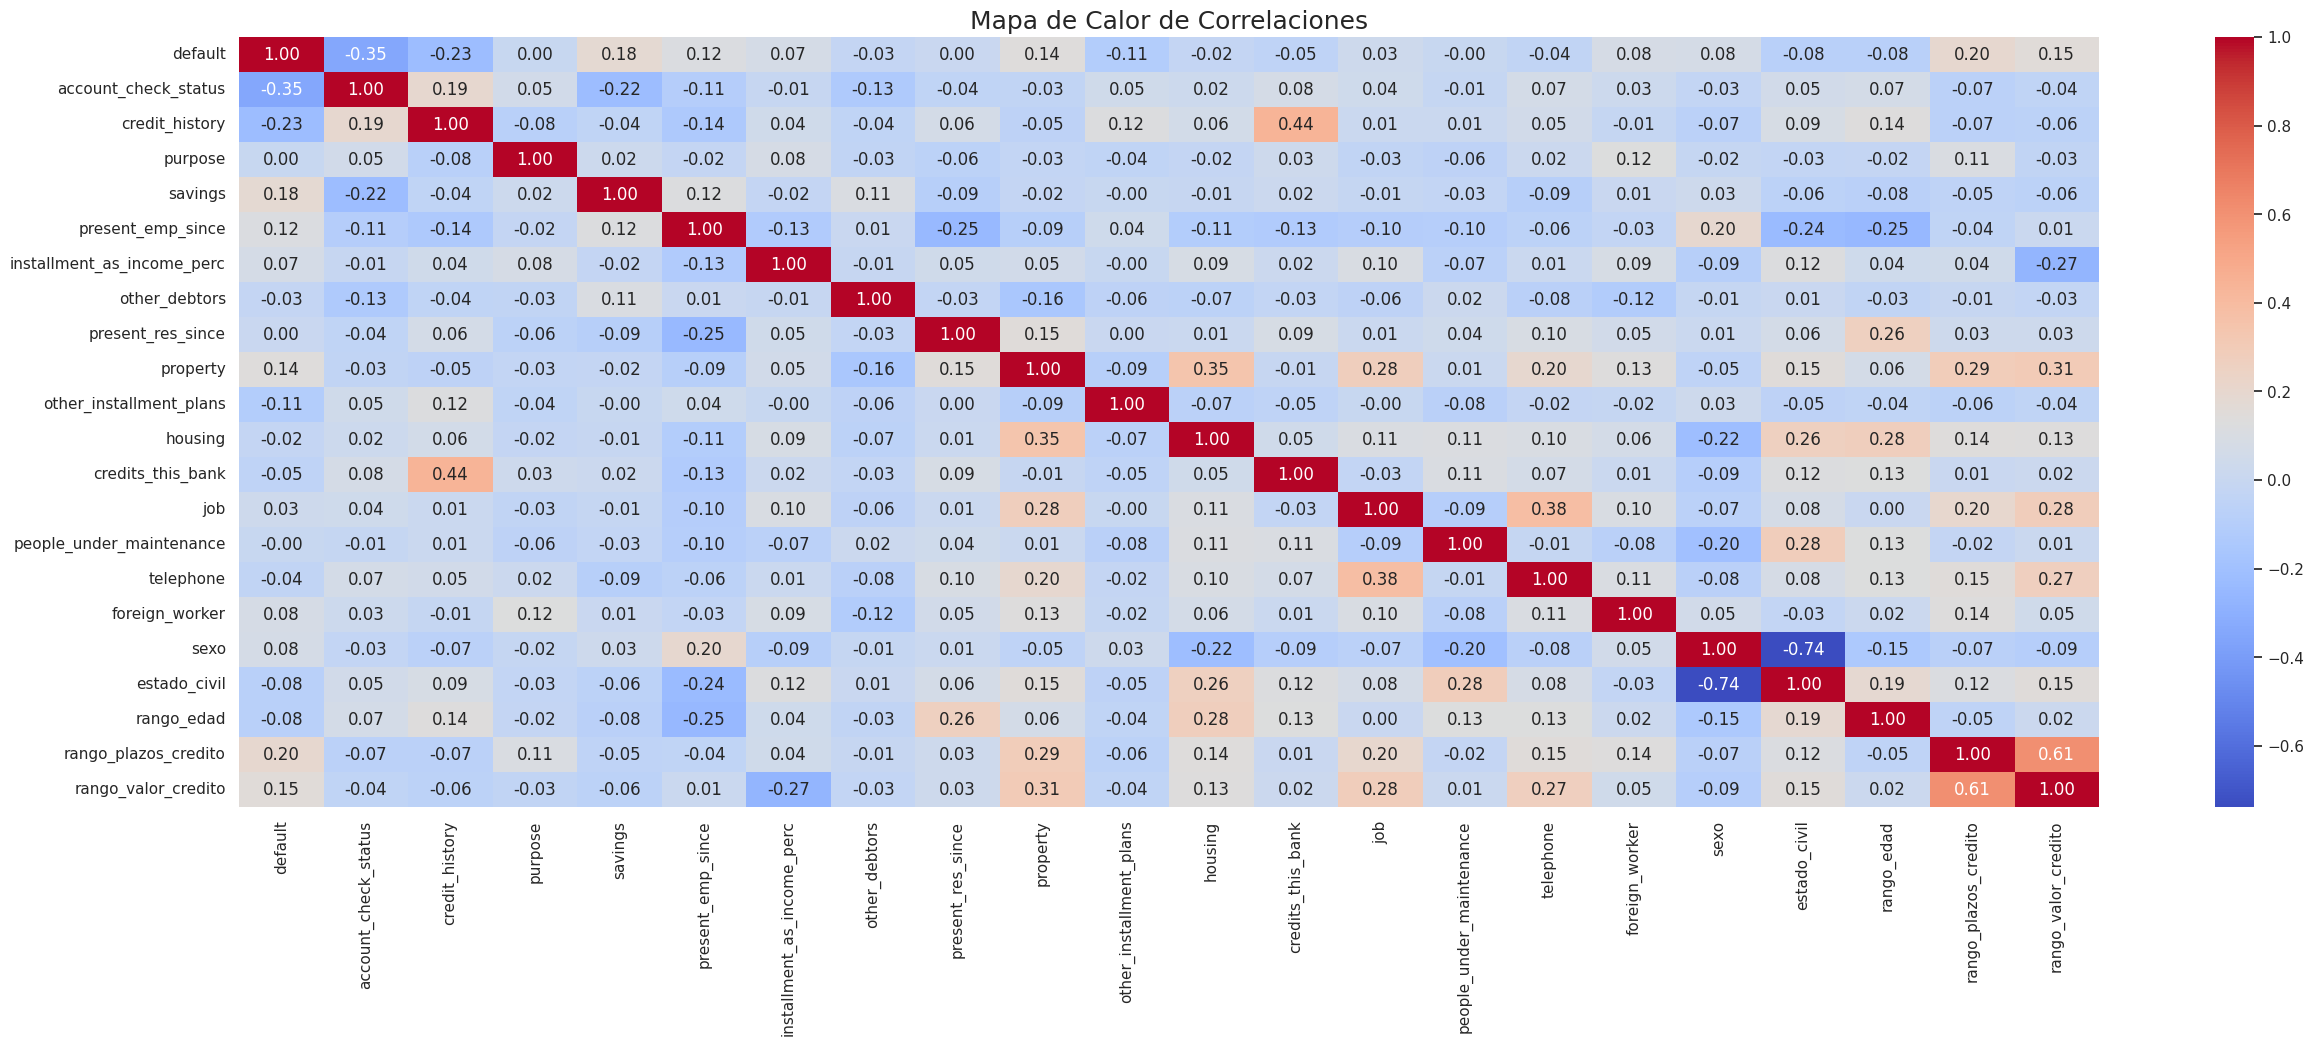

In [57]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

# 4. Construcción de Modelos

In [58]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [59]:
# prompt: ejemplo de modelo de machine learning de clasificacion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)

Accuracy: 0.772


In [60]:
#Modelos a Incluir
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)

      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [61]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.6933333333333334
0.4625
0.43023255813953487
0.4457831325301205
0.6146489893501412


Random Forest
0.79
0.7254901960784313
0.43023255813953487
0.5401459854014599
0.7776570310802


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




# **5. Evaluación y Selección del Modelo**

In [62]:
#Visualiza resultados
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Cuál de estos modelos seleccionarías y por qué?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

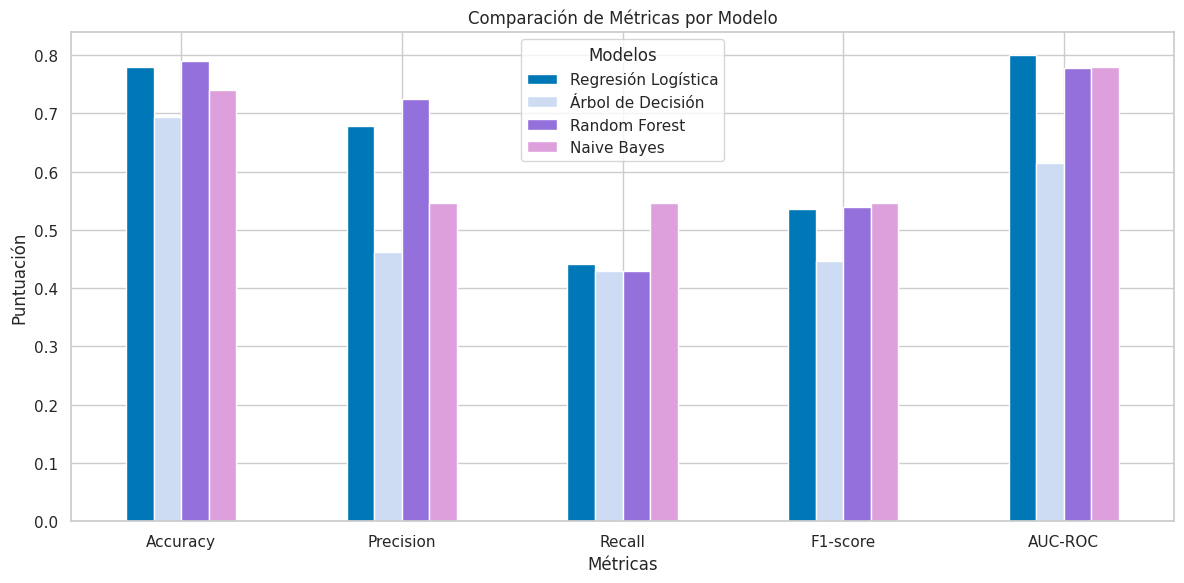

In [63]:
visualiza_resultados()

# **Desafios**

Desafíos:

Evaluar la Matrix de Confusión

Balancear la variable target

Seleccionar sólo algunas variable y reevaluar


**GLOSARIO**

Accuracy: Predicciones correctas dividido el número total de predicciones.

Precisión: Verdaderos positivos dividido el total de instancias clasificas como positivas. Hay que prestarle atención cuando queremos minimizar los falsos positivos (Error de tipo 1)

Recall: Es la fracción de instancias positivas que el modelo predijo de forma correcta. Es la cantidad de verdaderos positivos dividido el total de instancias verdaderamente positivas. Es importante cuando queremos minimizar los falsos negativos (Error de tipo 2)

F1-Score: Combinación de la precisión y el recall en un solo valor.

AUC-ROC: Es el área bajo la curva ROC. La curva ROC representa graficamente la tasa de verdaderos positivos frente a la tasa de falsos positivos. Proporciona una medida de la capacidad de discriminación del modelo. Los valores cercanos a 1 indican un buen rendimiento del modelo.

##1. **Evaluar la Matrix de Confusión**


**Respuesta analisis:** ⬇

 4  opciones  se conocen como la matriz de confusión.  Veamos de nuevo esos  4 resultados posibles:

Verdadero positivo: El valor real es positivo y  la prueba predijo tambien que era positivo. O bien una persona está enferma y la prueba así lo demuestra.


Verdadero negativo: El valor real  es negativo y la prueba predijo tambien que el resultado era negativo. O bien la persona no está enferma y la prueba así lo  demuestra.


Falso negativo: El valor real es positivo, y la prueba predijo  que el resultado es negativo. La persona está enferma, pero la prueba dice de manera incorrecta que no lo está. Esto es lo que en estadística se conoce como error tipo II


Falso positivo: El valor real es negativo, y la prueba predijo  que el resultado es positivo. La persona no está enferma, pero la prueba nos dice de manera incorrecta que silo está.
Esto es lo que en estadística se conoce como error tipo

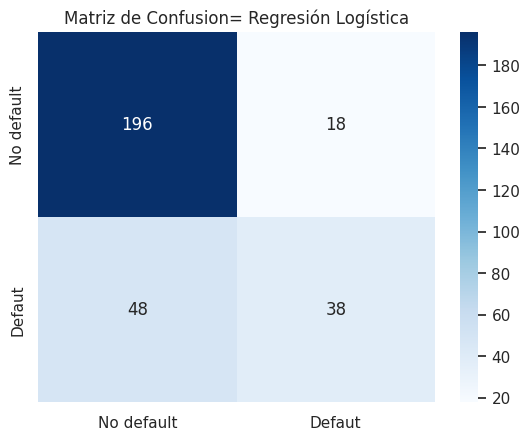

Model:Regresión Logística
Accuracy:0.78
Precision:0.6785714285714286
Recall:0.4418604651162791
F1-Score:0.5352112676056338
AUC-ROC:0.799934796783308
..........................



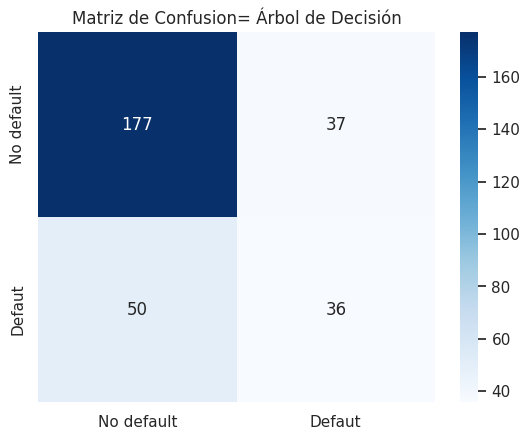

Model:Árbol de Decisión
Accuracy:0.71
Precision:0.4931506849315068
Recall:0.4186046511627907
F1-Score:0.45283018867924524
AUC-ROC:0.6228537274505543
..........................



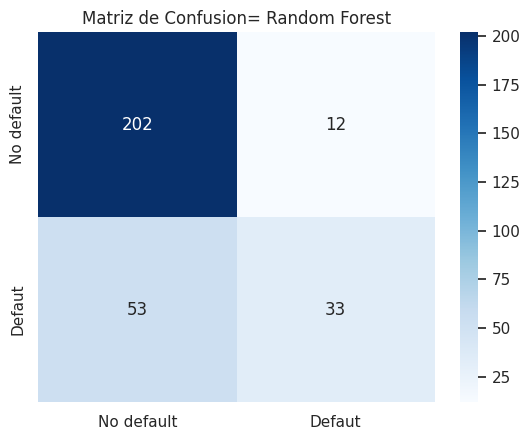

Model:Random Forest
Accuracy:0.7833333333333333
Precision:0.7333333333333333
Recall:0.38372093023255816
F1-Score:0.5038167938931298
AUC-ROC:0.789176266029124
..........................



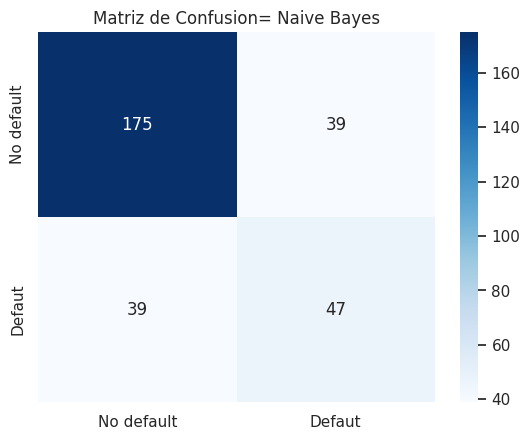

Model:Naive Bayes
Accuracy:0.74
Precision:0.5465116279069767
Recall:0.5465116279069767
F1-Score:0.5465116279069767
AUC-ROC:0.7800478156922409
..........................



In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Definiendi variables

X = df_banco.drop(columns='default', axis=1) #variable independientes
y = df_banco['default'] #variables dependientes
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 77)

#Modelos
models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

#results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

for name, model in models.items():
    #Entrenamiento
    model.fit(train_x, train_y)
    #Prediccion
    predictions = model.predict(test_x)
    #Metricas de Rendimiento
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions)
    recall = recall_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)

  #matriz de Confusion
    conf_matrix =  confusion_matrix(test_y, predictions)
    sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='Blues', xticklabels= ['No default', 'Defaut'], yticklabels=['No default','Defaut'])
    plt.title(f'Matriz de Confusion= {name}')
    plt.show()

    if hasattr(model, "predict_proba"):
      proba = model.predict_proba(test_x)
      roc_auc = roc_auc_score(test_y, proba[:, 1])
    else:
        roc_auc = None

    print(f'Model:{name}')
    print(f'Accuracy:{accuracy}')
    print(f'Precision:{precision}')
    print(f'Recall:{recall}')
    print(f'F1-Score:{f1}')
    print(f'AUC-ROC:{roc_auc}')
    print('..........................\n')





Bueno observando los diferentes modelos plasmados en la matriz de confusion podemos observar que no tiene ni una alta precision ni un alto recall, por tal razon se recomienda balancear las clases. Y el que definitivamente no logra clasificar la clase correctamente es el arbol de decision

# **2.  Balancear la variable target**

**Respuesta analisis: ⬇**

In [38]:
# prompt: Hacer over-oversampling con la variable 'default' = 1 dentro df_banco
'''
import imblearn
from imblearn.over_sampling import RandomOverSampler

# Separar las características y la variable objetivo
X = df_banco.drop('default', axis=1)
y = df_banco['default']

# Crear un objeto de oversampling
oversampler = RandomOverSampler(sampling_strategy='all')
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Oversamplear los datos
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos oversampleados(aumentados)
df_banco = pd.DataFrame(X_resampled, columns=X.columns)
df_banco_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
df_banco['default'] = y_resampled
df_banco_oversampled['default'] = y_resampled

# Mostrar el número de instancias por clase
df_banco['default'].value_counts()
df_banco_oversampled['default'].value_counts()

# Separar las clases
df_default_0 = df_banco[df_banco['default'] == 0]
df_default_1 = df_banco[df_banco['default'] == 1]

# Calcular la cantidad de muestras en la clase minoritaria
count_class_1 = df_default_1.shape[0]

# Hacer oversampling replicando muestras aleatorias
df_default_1_oversampled = df_default_1.sample(n=count_class_1, replace=True, random_state=42)

# Concatenar el DataFrame original con las muestras aumentadas
df_banco_oversampled = pd.concat([df_banco, df_default_1_oversampled], axis=0)



In [39]:
df_banco.default.value_counts(normalize=True) * 100

0    50.0
1    50.0
Name: default, dtype: float64

In [33]:
#conteo de clases
count_default_0, count_default_1 = df_banco.default.value_counts()

In [35]:
print('Cantidades por fila de clase')
print('Default_0:', count_default_0)
print('Default_1:', count_default_1)

Cantidades por fila de clase
Default_0: 700
Default_1: 300


In [36]:
#Dividiendo los Sets por clases
df_default_0 = df_banco[df_banco['default']==0]
df_default_1 = df_banco[df_banco['default']==1]


In [37]:
print('Dimension por tipo de clase')
print('Dim Default_0:', df_default_0.shape)
print('Dim Default_1:', df_default_1.shape)

Dimension por tipo de clase
Dim Default_0: (700, 22)
Dim Default_1: (300, 22)


In [66]:
df_default_1_over = df_default_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_default_0, df_default_1_over], axis=0)

In [67]:
print('Dimension por tipo de clase generadas')
print('Dim df_default_1_over:', df_default_1_over.shape)
print('Dim df_over:', df_over.shape)

Dimension por tipo de clase generadas
Dim df_default_1_over: (700, 22)
Dim df_over: (1400, 22)


In [68]:
print('Random over-sampling:')
print(df_over.default.value_counts())

Random over-sampling:
0    700
1    700
Name: default, dtype: int64


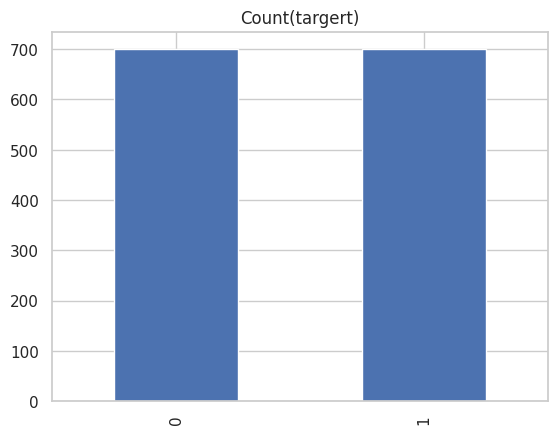

In [69]:
df_over.default.value_counts().plot(kind='bar',title='Count(targert)');

In [70]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [71]:
#Separacion de predictorias y predicha
X = df_banco.drop('default', axis=1)
y = df_banco['default']

In [75]:
smote= SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [78]:
df_X_sm = pd.DataFrame(data=X_sm, columns=X.columns)
df_y_sm = pd.DataFrame(data=y_sm, columns=['default'])

#Concatenar
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [79]:
df_balanceado_sm.default.value_counts()

0    700
1    700
Name: default, dtype: int64

In [80]:
df_balanceado_sm.dtypes

account_check_status          int64
credit_history                int64
purpose                       int64
savings                       int64
present_emp_since             int64
installment_as_income_perc    int64
other_debtors                 int64
present_res_since             int64
property                      int64
other_installment_plans       int64
housing                       int64
credits_this_bank             int64
job                           int64
people_under_maintenance      int64
telephone                     int64
foreign_worker                int64
sexo                          int64
estado_civil                  int64
rango_edad                    int64
rango_plazos_credito          int64
rango_valor_credito           int64
default                       int64
dtype: object

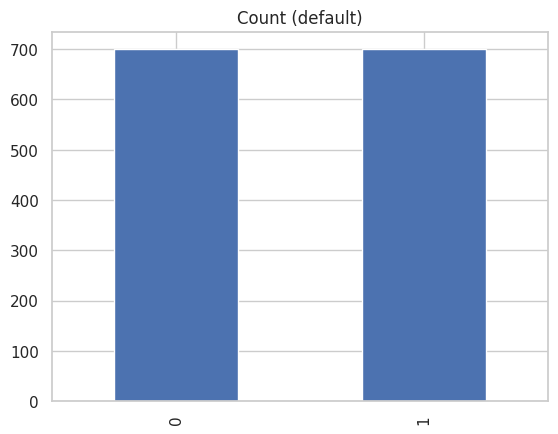

In [81]:
df_balanceado_sm.default.value_counts().plot(kind='bar', title= 'Count (default)');

In [82]:
#Modelos a Incluir
def crea_modelos_over():

  global df_balanceado_sm, resultados_over
  #Separacion de predictorias y predicha
  X_balance = df_balanceado_sm.drop(columns='default')
  y_balance= df_balanceado_sm['default']

  #Creacion de muestras de train y test
  train_x_balance, test_x_balance, train_y_balance, test_y_balance = train_test_split(X_balance, y_balance, test_size=0.30, random_state = 77)

  models_over = {
      'Regresión Logística_over': LogisticRegression(),
      'Árbol de Decisión_over': DecisionTreeClassifier(),
      'Random Forest_over': RandomForestClassifier(),
      'Naive Bayes_over': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models_over.items():
      model.fit(train_x_balance, train_y_balance)
      predictions_balance = model.predict(test_x_balance)

      accuracy = accuracy_score(test_y_balance, predictions_balance)
      precision = precision_score(test_y_balance, predictions_balance)
      recall = recall_score(test_y_balance, predictions_balance)
      f1 = f1_score(test_y_balance, predictions_balance)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x_balance)
          roc_auc = roc_auc_score(test_y_balance, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados_over = results

In [95]:
crea_modelos_over()
for i,model in enumerate(resultados_over['Model']):
  print(model)
  print(resultados_over['Accuracy'][i])
  print(resultados_over['Precision'][i])
  print(resultados_over['Recall'][i])
  print(resultados_over['F1-score'][i])
  print(resultados_over['AUC-ROC'][i])
  print('\n')

Regresión Logística_over
0.7619047619047619
0.7333333333333333
0.7777777777777778
0.7549019607843137
0.8472790972790973


Árbol de Decisión_over
0.7285714285714285
0.6875
0.7777777777777778
0.7298578199052133
0.7312312312312311


Random Forest_over
0.8261904761904761
0.7853881278538812
0.8686868686868687
0.8249400479616307
0.9112521612521612


Naive Bayes_over
0.6976190476190476
0.642570281124498
0.8080808080808081
0.7158836689038033
0.7844662844662844




In [85]:
#Visualiza resultados over
def visualiza_resultados_over():
  global df_balanceado_sm, resultados_over
  results_over_df = pd.DataFrame(resultados_over)
  results_over_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_over_df = results_over_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_over_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo_over_Sampling')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "¿Compara modelado normal o con Oversampling?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

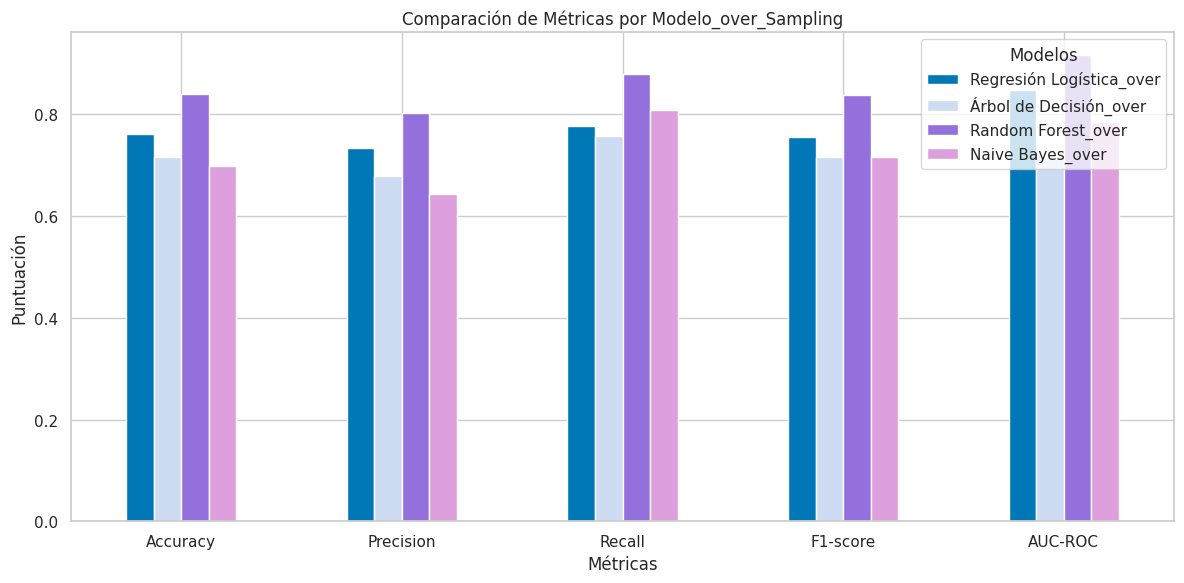

In [87]:
visualiza_resultados_over()

# 3. Seleccionar sólo algunas variable y reevaluar

**Respuesta analisis: ⬇**

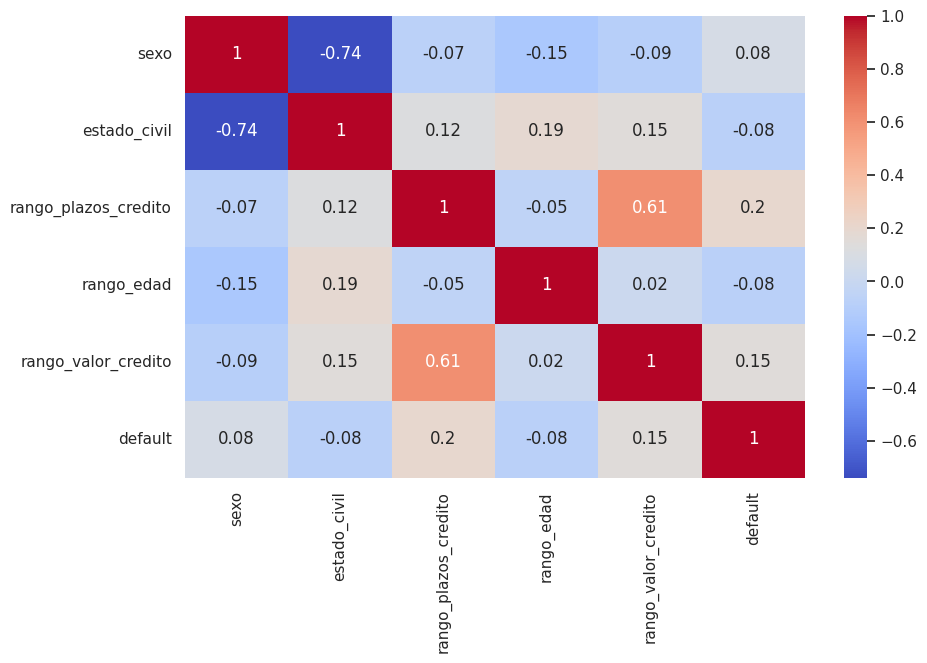

In [89]:

lista_hot_map = ['sexo','estado_civil','rango_plazos_credito','rango_edad','rango_valor_credito','default']
df_banco_2 = df_banco[lista_hot_map]
correlation_matrix = df_banco_2.corr().round(2)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

In [94]:
#Modelos a Incluir
def crea_modelos_seis_vab():
  global df_banco_2, resultados_seis_lab
  y = df_banco_2['default']
  x = df_banco_2.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística_seis_vab': LogisticRegression(),
      'Árbol de Decisión_seis_vab': DecisionTreeClassifier(),
      'Random Forest_seis_vab': RandomForestClassifier(),
      'Naive Bayes_seis_vab': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)

      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados_seis_lab = results

In [96]:
crea_modelos_seis_vab()
for i,model in enumerate(resultados_seis_lab['Model']):
  print(model)
  print(resultados_seis_lab['Accuracy'][i])
  print(resultados_seis_lab['Precision'][i])
  print(resultados_seis_lab['Recall'][i])
  print(resultados_seis_lab['F1-score'][i])
  print(resultados_seis_lab['AUC-ROC'][i])
  print('\n')

Regresión Logística_seis_vab
0.7133333333333334
0.5
0.12790697674418605
0.20370370370370372
0.5829167572266898


Árbol de Decisión_seis_vab
0.67
0.3617021276595745
0.19767441860465115
0.2556390977443609
0.5069278417735275


Random Forest_seis_vab
0.6766666666666666
0.39622641509433965
0.2441860465116279
0.302158273381295
0.5502064768528582


Naive Bayes_seis_vab
0.6833333333333333
0.38461538461538464
0.1744186046511628
0.24000000000000002
0.5941099760921539




In [99]:
#Visualiza resultados
def visualiza_resultados_seis_vab():
  global  df_banco_2, resultados_seis_lab
  results_df = pd.DataFrame(resultados_seis_lab)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo_con Seis_Variables')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

  # Texto que quieres centrar
  texto = "Modelo con seis variables¿Cual escoges?"

  # Crear una celda HTML con el texto centrado
  display(HTML(f"<center><h2>{texto}</h2></center>"))

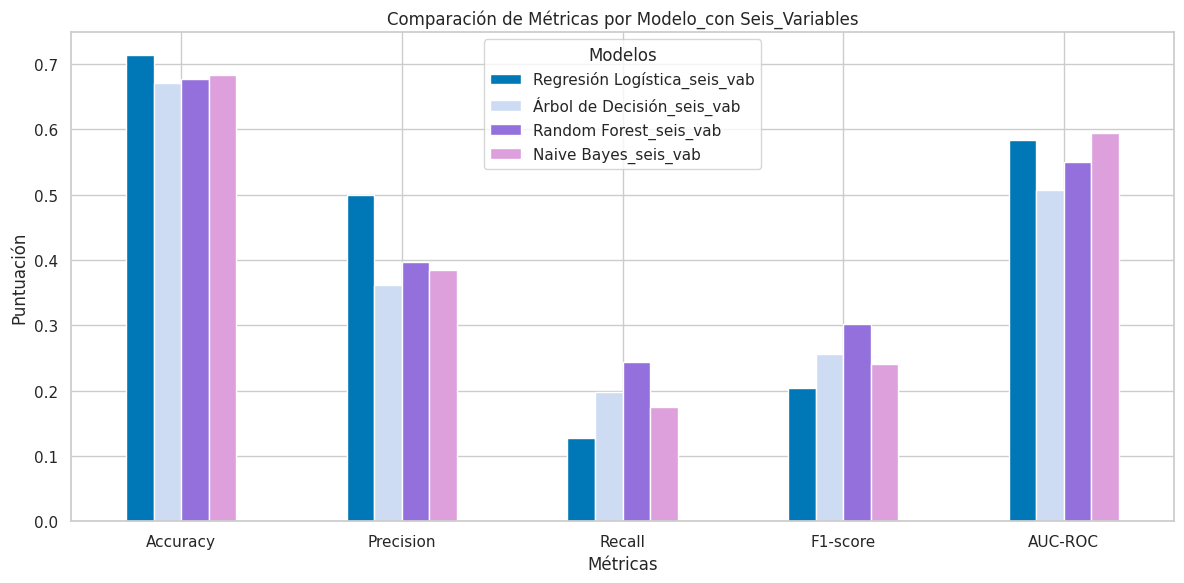

In [100]:
visualiza_resultados_seis_vab()

## **Modelos Entrenados**

In [102]:
#Modelo inicial propuesto por el profesor

crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.71
0.4939759036144578
0.47674418604651164
0.48520710059171596
0.6402412519017605


Random Forest
0.78
0.7
0.4069767441860465
0.5147058823529412
0.7911323625298848


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




In [103]:
#Modelo balanceados con Over_Sampling
crea_modelos_over()
for i,model in enumerate(resultados_over['Model']):
  print(model)
  print(resultados_over['Accuracy'][i])
  print(resultados_over['Precision'][i])
  print(resultados_over['Recall'][i])
  print(resultados_over['F1-score'][i])
  print(resultados_over['AUC-ROC'][i])
  print('\n')

Regresión Logística_over
0.7619047619047619
0.7333333333333333
0.7777777777777778
0.7549019607843137
0.8472790972790973


Árbol de Decisión_over
0.7309523809523809
0.6905829596412556
0.7777777777777778
0.7315914489311164
0.7334834834834836


Random Forest_over
0.8523809523809524
0.8177570093457944
0.8838383838383839
0.8495145631067962
0.9157566657566657


Naive Bayes_over
0.6976190476190476
0.642570281124498
0.8080808080808081
0.7158836689038033
0.7844662844662844




In [105]:
#Modelo con seis variables
crea_modelos_seis_vab()
for i,model in enumerate(resultados_seis_lab['Model']):
  print(model)
  print(resultados_seis_lab['Accuracy'][i])
  print(resultados_seis_lab['Precision'][i])
  print(resultados_seis_lab['Recall'][i])
  print(resultados_seis_lab['F1-score'][i])
  print(resultados_seis_lab['AUC-ROC'][i])
  print('\n')

Regresión Logística_seis_vab
0.7133333333333334
0.5
0.12790697674418605
0.20370370370370372
0.5829167572266898


Árbol de Decisión_seis_vab
0.67
0.3673469387755102
0.20930232558139536
0.26666666666666666
0.5126331232340795


Random Forest_seis_vab
0.6733333333333333
0.38461538461538464
0.23255813953488372
0.2898550724637681
0.5402358183003694


Naive Bayes_seis_vab
0.6833333333333333
0.38461538461538464
0.1744186046511628
0.24000000000000002
0.5941099760921539




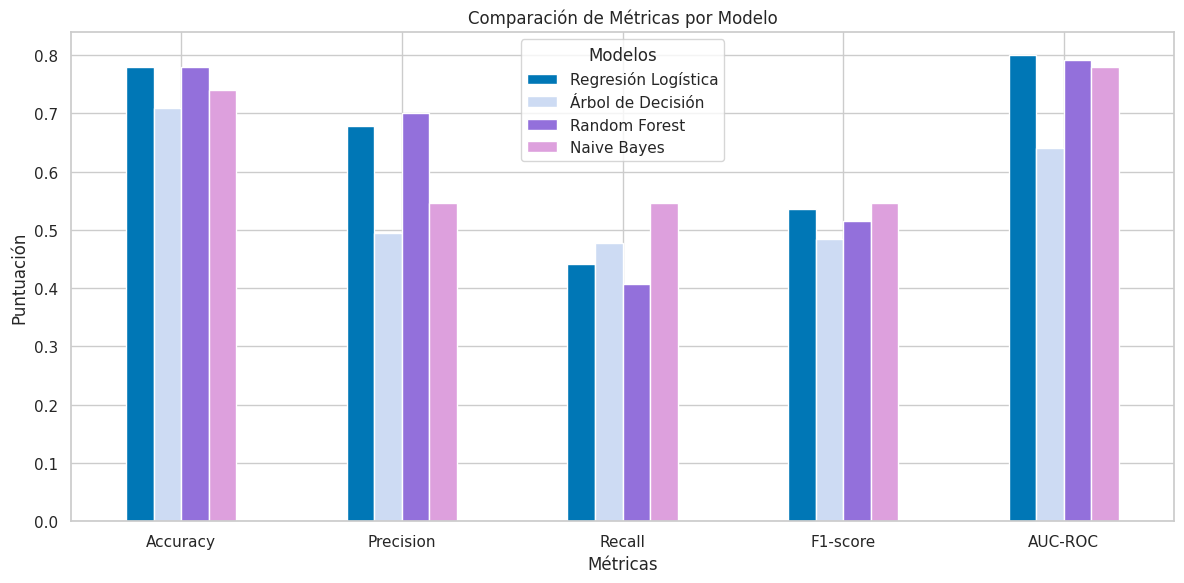

In [106]:
visualiza_resultados()

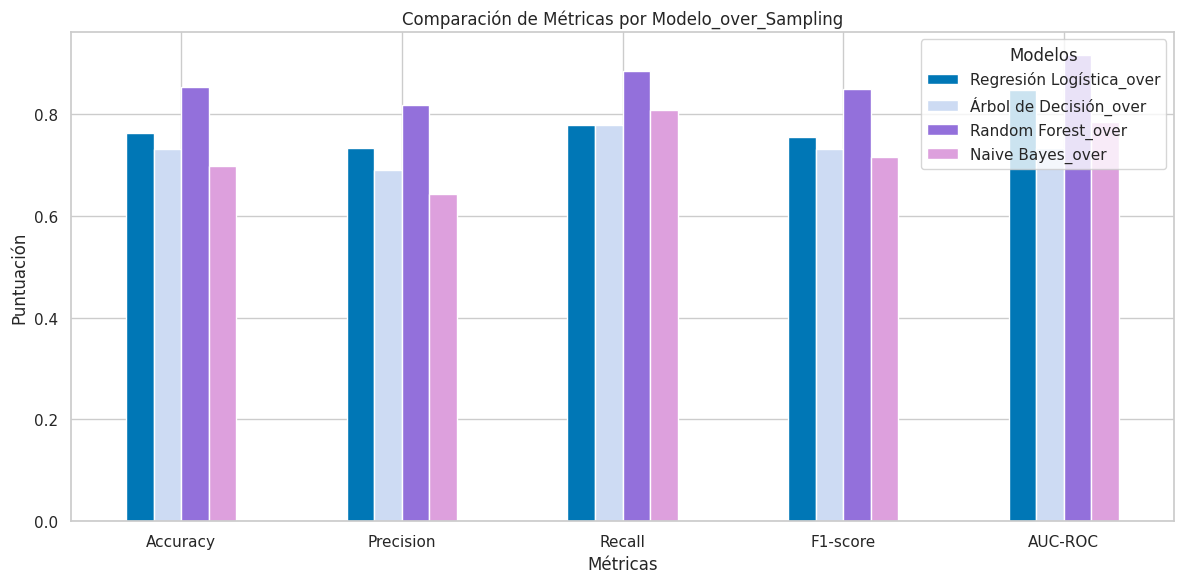

In [107]:
visualiza_resultados_over()

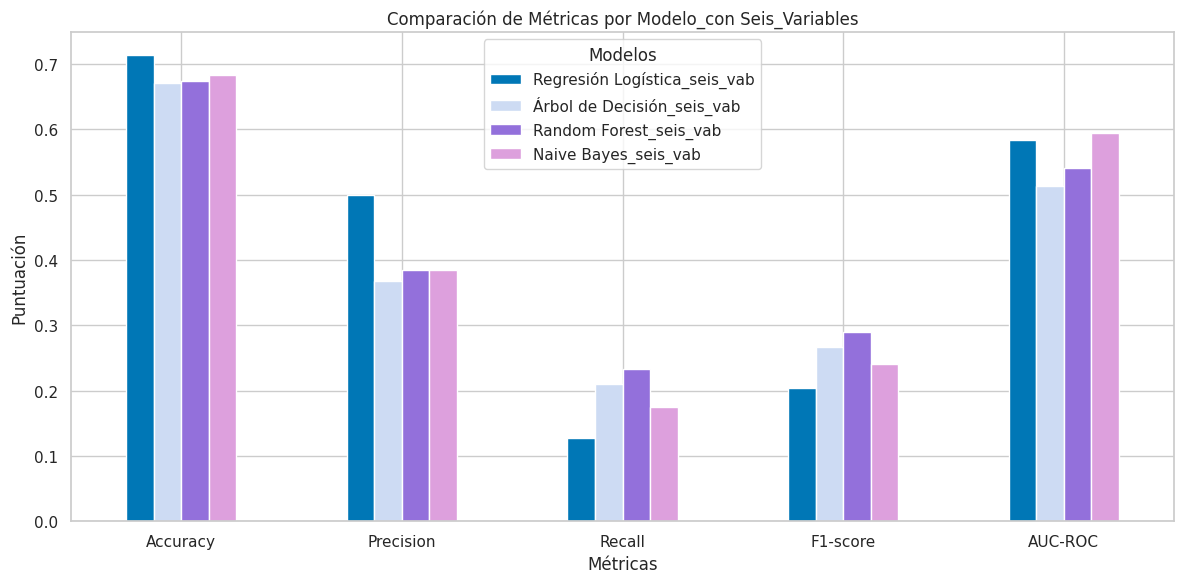

In [108]:
visualiza_resultados_seis_vab()

Realizando el balanceo de clases con over sampling se observa que mejoro tanto la precision como el recall, destacando el modelo de Random Forest.

El que definitivamente  mostro metricas muy bajas fue con las seis variables escogidas.